In [6]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, nbinom
import seaborn as sns
import pandas as pd

from Model_less_weird import Model
from PlaceInputs import PlaceInputs
from utils import *
import configs

# Parameters and Initialization

In [7]:
# Parameters
N_inp = 5000
N_bar = 5000
num_states = 100
steps = 100

In [8]:
place_inputs = PlaceInputs(N_inp, num_states).get_inputs()
model = Model(
    N_inp, N_bar, num_states, steps=steps
    )

In [9]:
cache_states = [0, 33, 66]

# Run Task (with learning)

In [10]:
_, place_acts, _, _ = model.run_nonrecurrent(place_inputs)

In [19]:
model.reset()

_, base_cache_acts, _, _ = model.run_recurrent(place_inputs)

mid_learning_cache_acts = []

for cache_state in cache_states:
    print("Now I just cached at location:", cache_state)
    preacts, acts, _, _ = model.run_recurrent(place_inputs, n_zero_input=20)
    mid_learning_cache_acts.append(acts)
    model.update(place_inputs[cache_state], acts[cache_state], preacts[cache_state])
    
_, post_cache_acts, _, _ = model.run_recurrent(place_inputs)
_, recall_acts, _, _ = model.run_wide_recall(place_inputs)

Now I just cached at location: 0
Now I just cached at location: 33
Now I just cached at location: 66


# Sort RNN neurons into cache/non-cache

In [20]:
noncache_neurons = []
cache_neurons = []
for i in np.arange(N_bar):
    state = int(i/N_inp * num_states)
    min_distance = np.inf
    for cache_state in cache_states:
        dist = distance(state, cache_state, num_states)
        if dist < min_distance:
            min_distance = dist
    if min_distance == 0:
        cache_neurons.append(i)
    elif min_distance > 10:
        noncache_neurons.append(i)
    else:
        continue

# Noncache neuron tuning

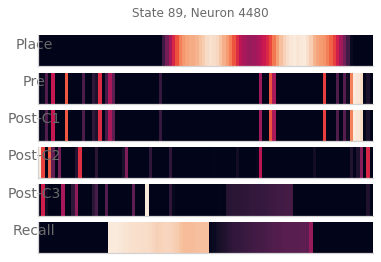

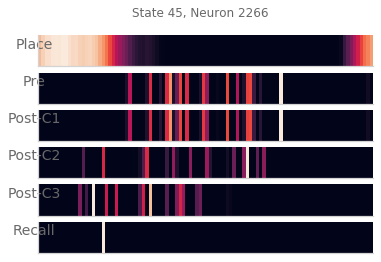

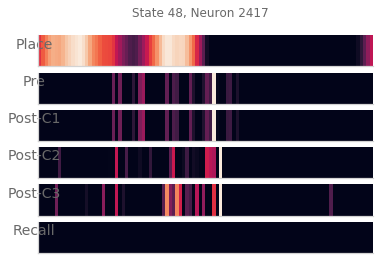

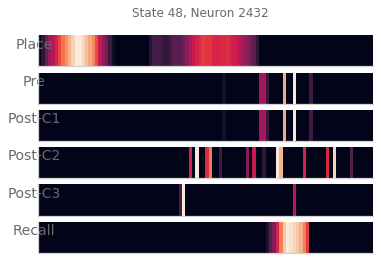

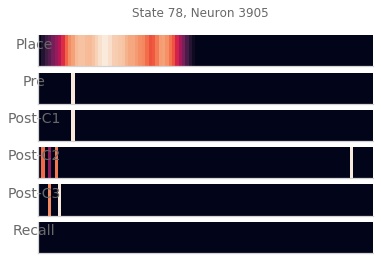

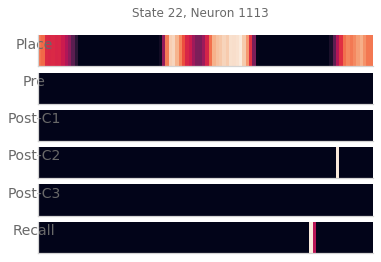

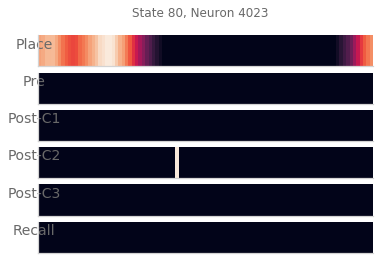

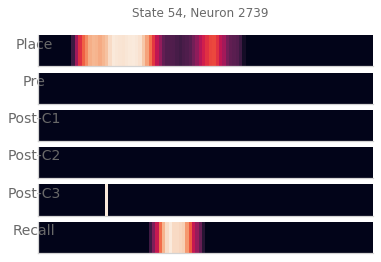

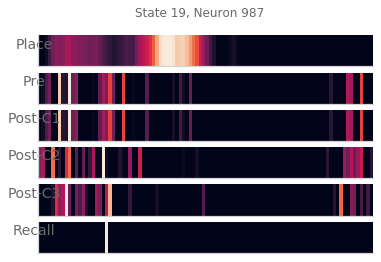

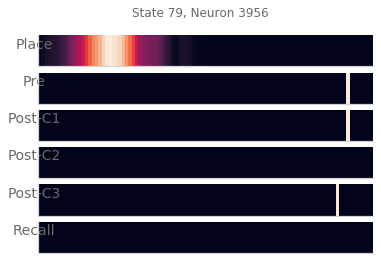

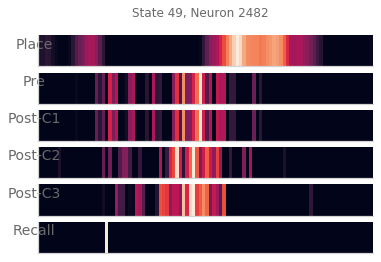

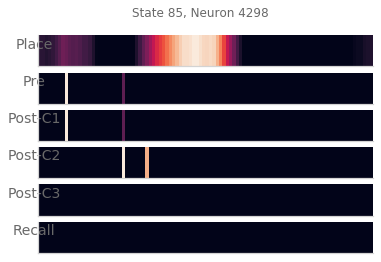

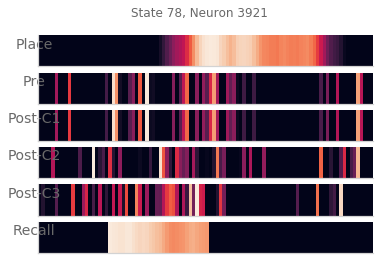

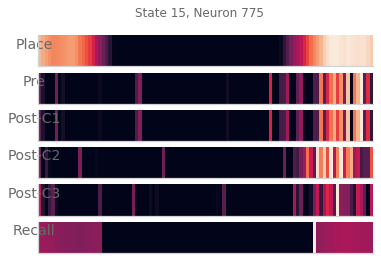

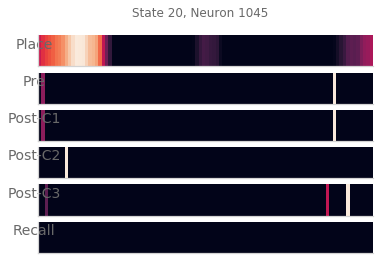

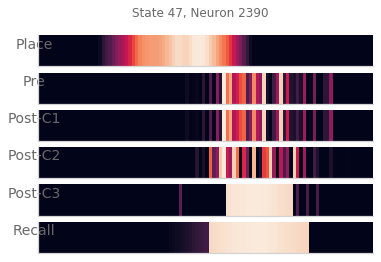

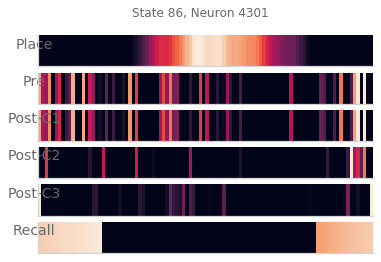

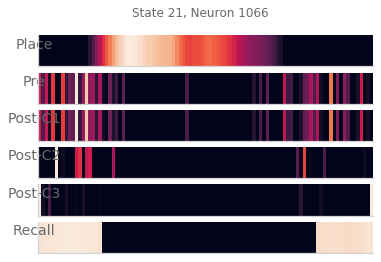

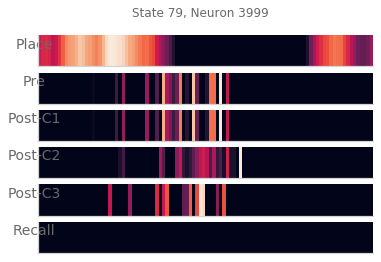

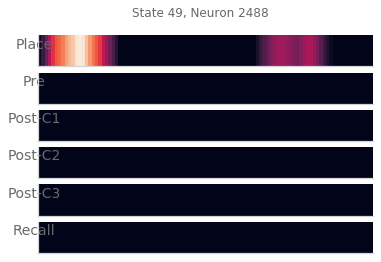

In [21]:
n_samples = 20
for _ in range(n_samples):
    idx = np.random.choice(noncache_neurons)
    fig, axs = plt.subplots(6, 1)
    axs[0].imshow(place_acts[:, idx].reshape((1,-1)), aspect='auto')
    axs[1].imshow(base_cache_acts[:,idx].reshape((1,-1)), aspect='auto')
    axs[2].imshow(mid_learning_cache_acts[0][:,idx].reshape((1,-1)), aspect='auto')
    axs[3].imshow(mid_learning_cache_acts[1][:,idx].reshape((1,-1)), aspect='auto')
    axs[4].imshow(post_cache_acts[:,idx].reshape((1,-1)), aspect='auto')
    axs[5].imshow(recall_acts[:,idx].reshape((1,-1)), aspect='auto')
    for ax in axs:
        ax.set_yticks([]); ax.set_xticks([])
    axs[0].set_ylabel('Place', rotation=0)
    axs[1].set_ylabel('Pre', rotation=0)
    axs[2].set_ylabel('Post-C1', rotation=0)
    axs[3].set_ylabel('Post-C2', rotation=0)
    axs[4].set_ylabel('Post-C3', rotation=0)
    axs[5].set_ylabel('Recall', rotation=0)
    plt.suptitle(f'State {int(idx/N_inp * num_states)}, Neuron {idx}')
    plt.show()

# Cache neuron tuning

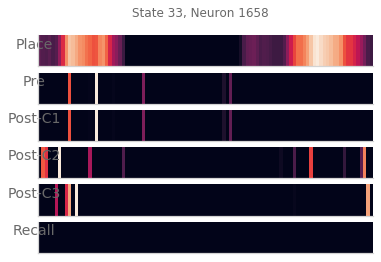

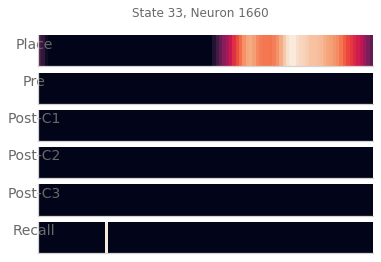

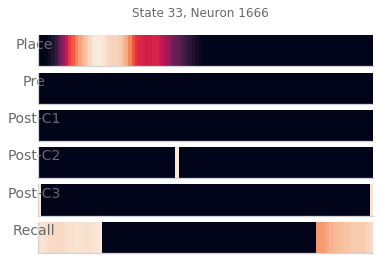

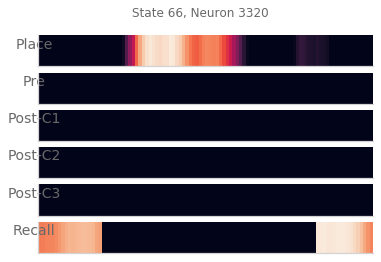

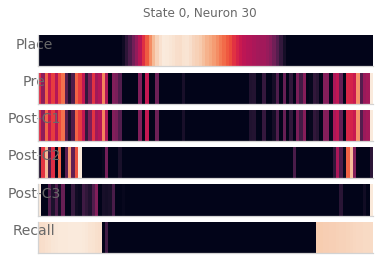

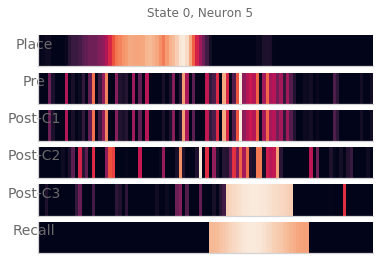

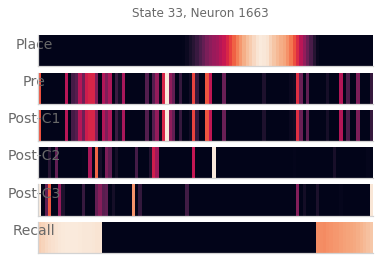

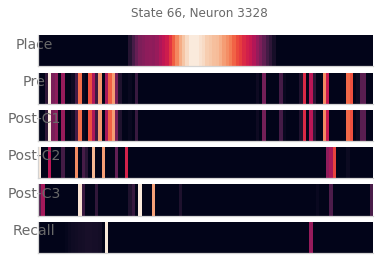

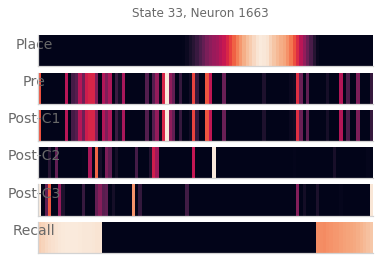

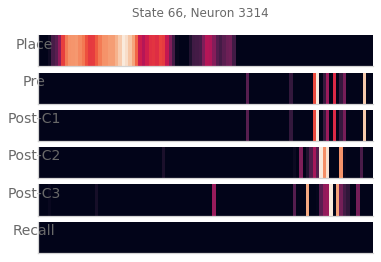

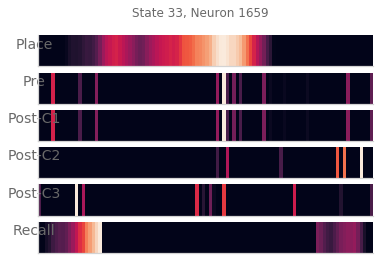

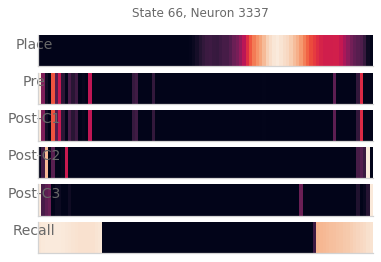

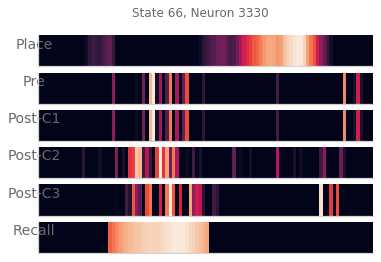

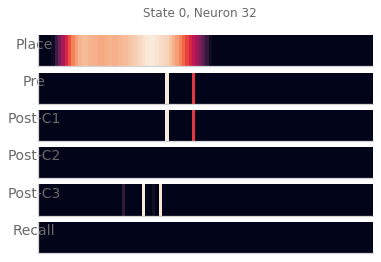

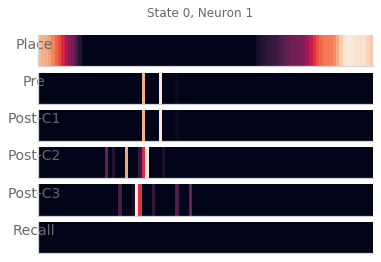

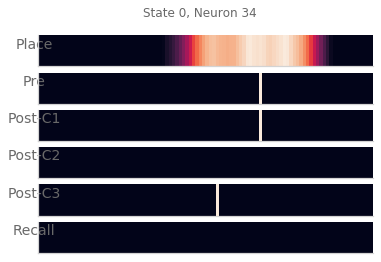

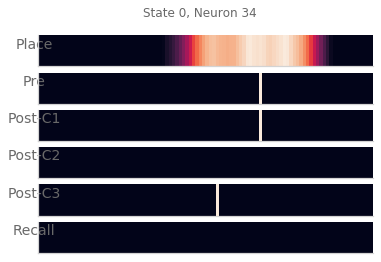

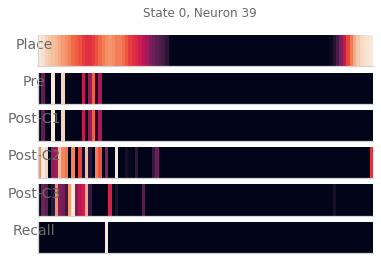

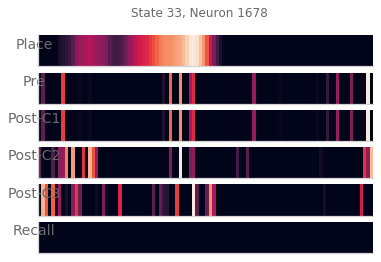

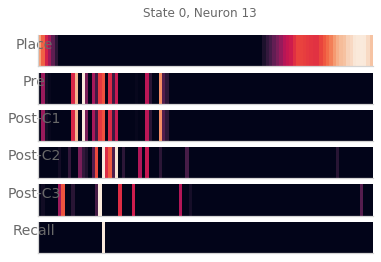

In [22]:
n_samples = 20
for _ in range(n_samples):
    idx = np.random.choice(cache_neurons)
    fig, axs = plt.subplots(6, 1)
    axs[0].imshow(place_acts[:, idx].reshape((1,-1)), aspect='auto')
    axs[1].imshow(base_cache_acts[:,idx].reshape((1,-1)), aspect='auto')
    axs[2].imshow(mid_learning_cache_acts[0][:,idx].reshape((1,-1)), aspect='auto')
    axs[3].imshow(mid_learning_cache_acts[1][:,idx].reshape((1,-1)), aspect='auto')
    axs[4].imshow(post_cache_acts[:,idx].reshape((1,-1)), aspect='auto')
    axs[5].imshow(recall_acts[:,idx].reshape((1,-1)), aspect='auto')
    for ax in axs:
        ax.set_yticks([]); ax.set_xticks([])
    axs[0].set_ylabel('Place', rotation=0)
    axs[1].set_ylabel('Pre', rotation=0)
    axs[2].set_ylabel('Post-C1', rotation=0)
    axs[3].set_ylabel('Post-C2', rotation=0)
    axs[4].set_ylabel('Post-C3', rotation=0)
    axs[5].set_ylabel('Recall', rotation=0)
    plt.suptitle(f'State {int(idx/N_inp * num_states)}, Neuron {idx}')
    plt.show()

# Check cache activity differences

Cache 0
4.3029565977845765



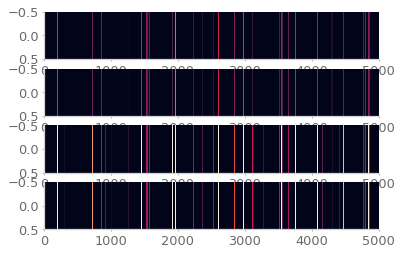

Cache 33
4.347477402329841



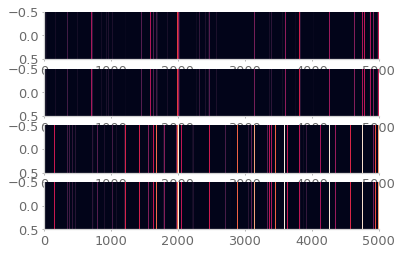

Cache 66
4.081373380984886



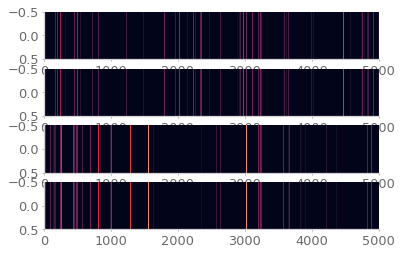

In [23]:
for c in cache_states:
    print(f'Cache {c}')
    pre = base_cache_acts[c].reshape((1,-1))
    post1 = mid_learning_cache_acts[0][c].reshape((1,-1))
    post2 = mid_learning_cache_acts[1][c].reshape((1,-1))
    post3 = mid_learning_cache_acts[2][c].reshape((1,-1))
    im1 = pre
    im2 = post1
    im3 = post3
    im4 = post3
    #for im in [im1, im2, im3, im4]:
    #    im /= im.max()
    vmin = min([i.min() for i in [im1, im2, im3, im4]])
    vmax = min([i.max() for i in [im1, im2, im3, im4]])
    fig, axs = plt.subplots(4, 1)
    axs[0].imshow(pre, aspect='auto', vmin=vmin, vmax=vmax)
    axs[1].imshow(im2, aspect='auto', vmin=vmin, vmax=vmax)
    axs[2].imshow(im3, aspect='auto', vmin=vmin, vmax=vmax)
    axs[3].imshow(im4, aspect='auto', vmin=vmin, vmax=vmax)
    print(vmax)
    print()
    plt.show()

Cache 0


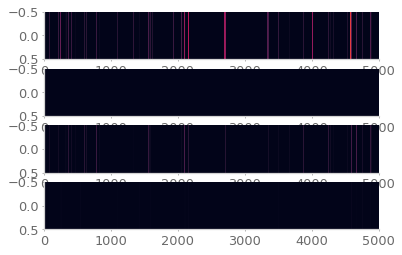

Cache 33


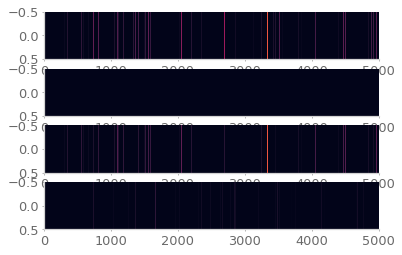

Cache 66


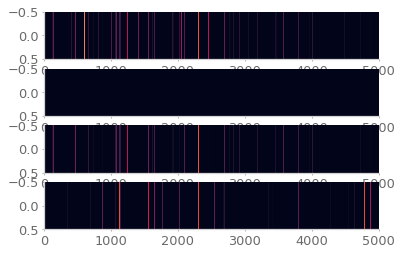

In [16]:
for c in cache_states:
    print(f'Cache {c}')
    pre = base_cache_acts[c].reshape((1,-1))
    post1 = mid_learning_cache_acts[0][c].reshape((1,-1))
    post2 = mid_learning_cache_acts[1][c].reshape((1,-1))
    post3 = mid_learning_cache_acts[2][c].reshape((1,-1))
    pre /= pre.max()
    post1 /= post1.max()
    post2 /= post2.max()
    post3 /= post3.max()
    im1 = pre
    im2 = pre - post1
    im3 = post1 - post2
    im4 = post3 - post2
        
    vmax = max(im1.max(), im2.max(), im3.max(), im4.max())
    fig, axs = plt.subplots(4, 1)
    axs[0].imshow(pre, aspect='auto', vmin=0, vmax=vmax)
    axs[1].imshow(im2, aspect='auto', vmin=0, vmax=vmax)
    axs[2].imshow(im3, aspect='auto', vmin=0, vmax=vmax)
    axs[3].imshow(im4, aspect='auto', vmin=0, vmax=vmax)
    plt.show()